# Ridge Regression

## OLS

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
np.random.seed(3)

In [3]:
def find_beta_hat(X, y):
    return np.linalg.pinv(X) * y

In [4]:
x = np.arange(0, np.math.pi, 0.1)
err = np.random.randn(len(x))
y = np.sin(x) + 0.1 * err

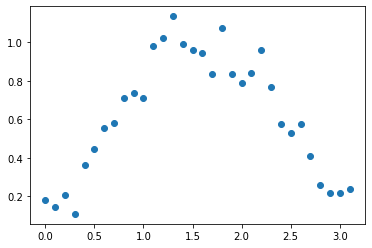

In [5]:
plt.scatter(x, y)

In [6]:
X = np.matrix(np.column_stack((x, x**2)))
X = sm.add_constant(X)
Y = np.matrix(y).T

In [7]:
X.shape

(32, 3)

In [8]:
Y.shape

(32, 1)

In [9]:
beta_hat = find_beta_hat(X, Y)

In [10]:
beta_hat

matrix([[-0.00748471],
        [ 1.20989074],
        [-0.38285503]])

In [11]:
def calc_y_hat(X, beta_hat):
    return X * beta_hat

In [12]:
y_hat = calc_y_hat(X, beta_hat)

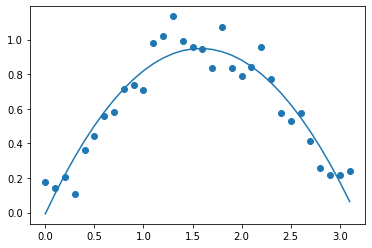

In [13]:
plt.scatter(x, y)
plt.plot(x, y_hat)
plt.show()

## Ridge

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}$$

In [14]:
def find_beta_hat_ridge(X, y, lam):
    return np.linalg.inv(X.T * X + lam * np.eye(X.shape[1])) * X.T * y

In [15]:
beta_hat_ridge = find_beta_hat_ridge(X, Y, 1)

In [16]:
beta_hat_ridge

matrix([[ 0.21180362],
        [ 0.79391986],
        [-0.25417679]])

In [17]:
y_hat_ridge = calc_y_hat(X, beta_hat_ridge)

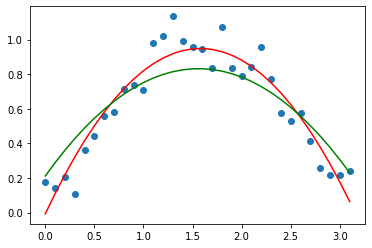

In [18]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.plot(x, y_hat_ridge, color='g')
plt.show()

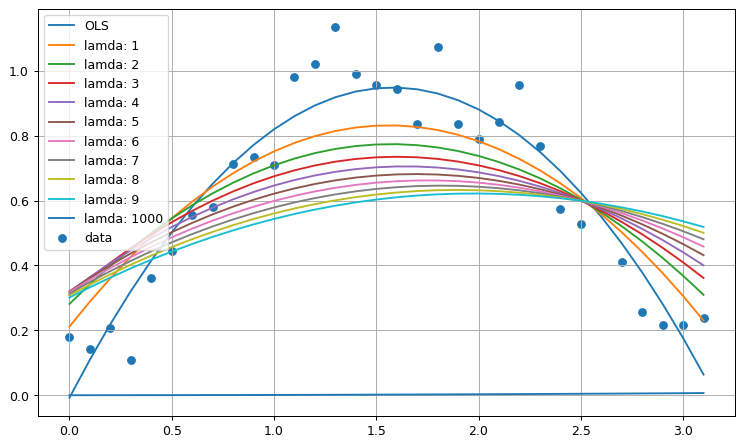

In [19]:
plt.figure(figsize=(10, 6), dpi=90)
plt.scatter(x, y, label='data')
plt.plot(x, y_hat, label='OLS')

for lam in range(1, 10):
    beta_hat_ridge = find_beta_hat_ridge(X, Y, lam)
    y_hat_ridge = calc_y_hat(X, beta_hat_ridge)
    plt.plot(x, y_hat_ridge, label='lamda: ' + str(lam))

beta_hat_ridge = find_beta_hat_ridge(X, Y, 100000)
y_hat_ridge = calc_y_hat(X, beta_hat_ridge)
plt.plot(x, y_hat_ridge, label='lamda: ' + str(1000))

plt.legend()
plt.grid()
plt.show()